# K-Means Clustering

## 1 - Packages ##

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from JSAnimation import IPython_display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: working with synthetic dataset to see how the algorithm works.

In [4]:
np.random.seed(37)
X = np.vstack(((np.random.randn(150, 2)  + np.array([3, 0])),
               (np.random.randn(100, 2)  + np.array([-3.5, 0.5])),
               (np.random.randn(100, 2) + np.array([-0.5, -2])),
               (np.random.randn(150, 2) + np.array([-2, -2.5])),
               (np.random.randn(150, 2) + np.array([-5.5, -3]))))

In [5]:
print('First five examples: ', X[:5])

First five examples:  [[ 2.94553639  0.67430807]
 [ 3.34664703 -1.30034617]
 [ 4.51851188  0.98982371]
 [ 3.2776809  -0.44858935]
 [ 3.96196624 -0.82757864]]


In [6]:
print('X.shape:', X.shape)

X.shape: (650, 2)


## 3 - Visualisation

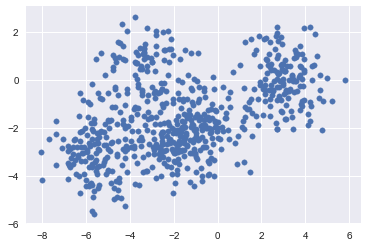

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=30)
ax = plt.gca()

## 4 - K-Means. General Architecture

K-Means is an algorithm which clusters the data into K clusters. The algorithm works as follows:
1. Pick $k$ random points as cluster centers called centroids
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid
3. Find new cluster center by taking the average of the assigned points
4. Repeat Step 2 and 3 until none of the cluster assignments change


**Step 1**

Pick $k$ cluster centers (centroids: $c_1,c_2,…,c_k$):
$$c_1,c_2,…,c_k є C,$$ 


**Step 2**

Assign each input value to closest center using squared Euclidian norm:
$$\arg \min_{c_i \in C} ||x - c_i||^2.$$


**Step 3**

Finding the new centroid by taking the average:
$$c_i = \frac{1}{\lvert S_i \rvert}\sum_{x_i \in S_i} x_i,$$

$S_i$ is the set of all points assigned to the $i_{th}$ cluster.


**Step 4**

Repeating *Step 2* and *Step 3* until convergence.

In [8]:
class KMeans(object):
    
    def __init__(self, X, k):
        self.X = X
        self.k = k
        
    def initialize_centroids(self):

        # use shuffle with random state = 512, and pick first k points
        np.random.seed(512)
        return np.random.permutation(self.X)[:self.k]
             
    def closest_centroid(self, centroids):
        
        return np.vectorize(lambda x:  np.argmin([np.linalg.norm(x-c) for c in centroids]), signature='(m)->()')(self.X)
    
    def move_centroids(self, centroids):
        
        idx = self.closest_centroid(centroids)
        return np.array([np.mean(X[idx == u], axis=0) for u in np.unique(idx)])

        
    def final_centroids(self):

        prev_centroids = self.initialize_centroids()
        next_centroids = self.move_centroids(prev_centroids)
        
        while(not np.array_equal(prev_centroids, next_centroids)):
          prev_centroids = next_centroids
          next_centroids = self.move_centroids(prev_centroids)
        
        centroids = next_centroids
        
        idx = self.closest_centroid(centroids)
        clusters = [X[idx == u] for u in np.unique(idx)]

        return clusters, centroids

** Initializing model:**

In [9]:
model = KMeans(X, 3)

**Initializing centroids:**

In [10]:
centroids = model.initialize_centroids()
print('Random centroids:', centroids)

Random centroids: [[-1.40039209 -2.75287814]
 [-1.63504004 -2.59016237]
 [ 2.26881985  0.83999591]]


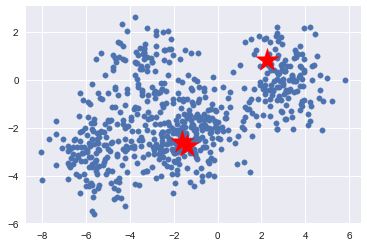

In [11]:
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Finding closest centroids:**

In [12]:
closest = model.closest_centroid(centroids)
print('Closest centroids:', closest[:10])

Closest centroids: [2 2 2 2 2 2 2 2 2 2]


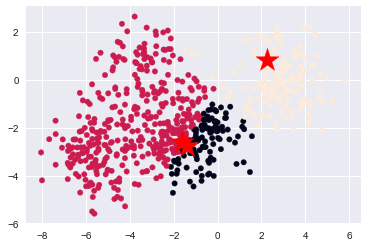

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=closest)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Move centroids:**

In [14]:
next_centroids = model.move_centroids(centroids)
print('Next centroids:', next_centroids)

Next centroids: [[-0.52555543 -2.61409225]
 [-3.77584338 -1.83022158]
 [ 2.83673723 -0.03476791]]


In [15]:
clusters, final_centrs = model.final_centroids()
print('Final centroids:', final_centrs)
print('Clusters points:', clusters[0][0], clusters[1][0], clusters[2][0])

Final centroids: [[-1.78766936 -1.54395138]
 [-5.31097327 -2.7087451 ]
 [ 2.92388133 -0.10237201]]
Clusters points: [-2.85012507 -0.77129955] [-5.73089369 -0.18855257] [2.94553639 0.67430807]


Animate the algoritm:


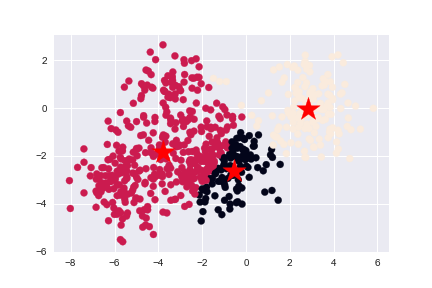
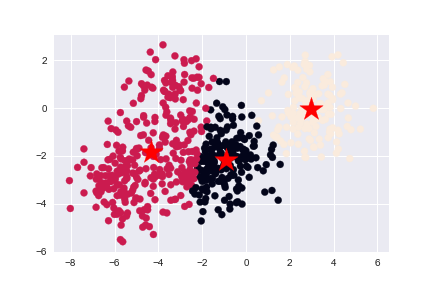
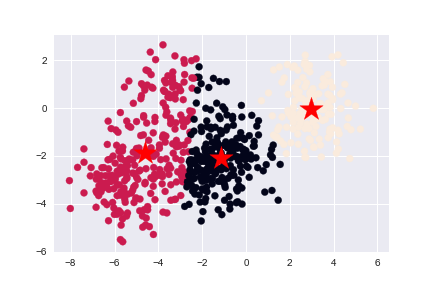
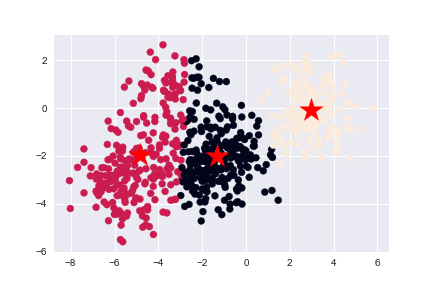
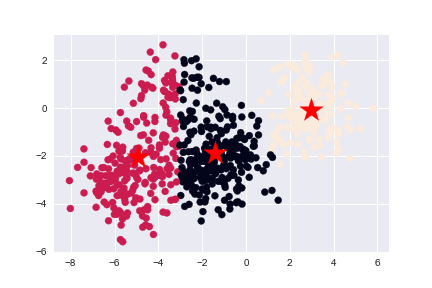
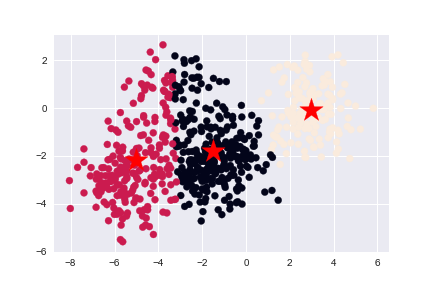
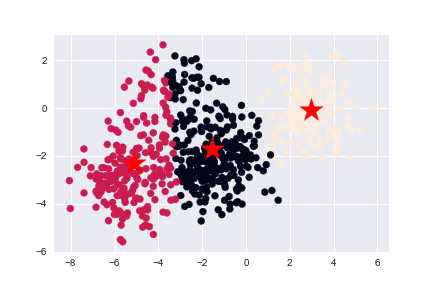
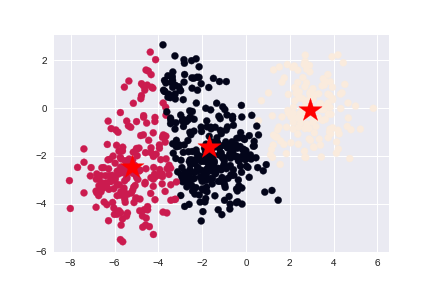
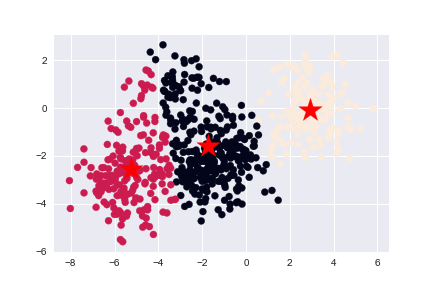
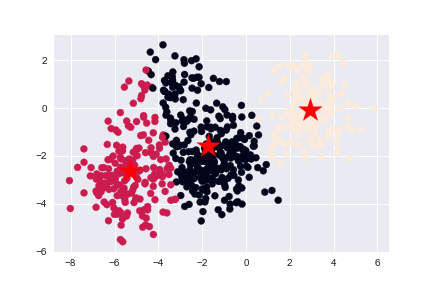
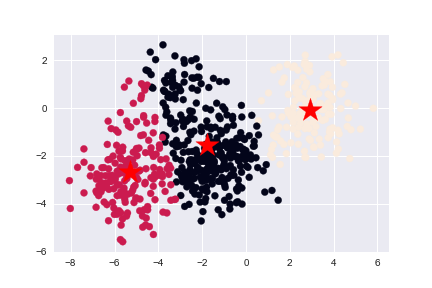
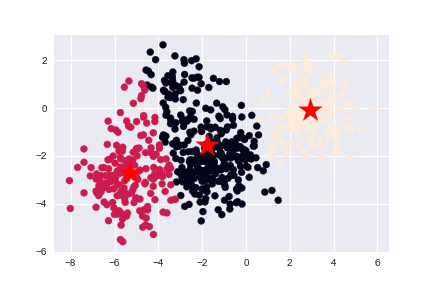
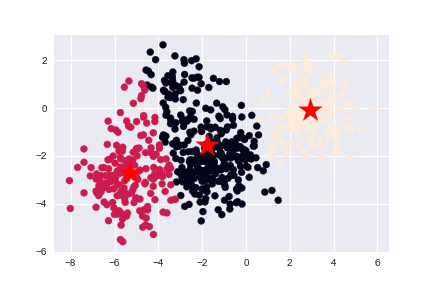
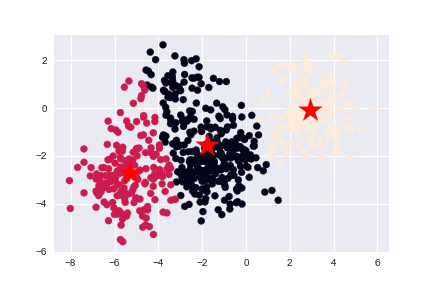
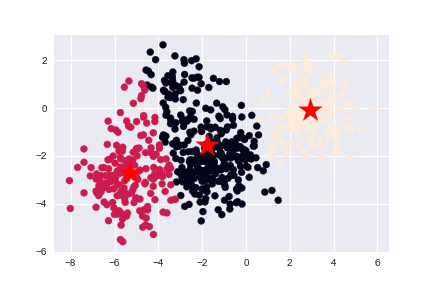

In [16]:
from JSAnimation import IPython_display
from matplotlib import animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model.closest_centroid(centroids)
    centroids = model.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=15, interval=150, blit=True)

## 5 - Optimal Value of K

Use "elbow" method to find the right value of k. Fot this we need to calculate the avg sum of squared distance between points and centroid in cluster:

$$W_k = \frac{1}{k}\sum_{i=1}^{k} \sum_{j}^{n_s} ||x_{ij} - c_i||^2$$


In [17]:
def mean_distances(k, X):
    result = []
        
    for k_i in range(1,k+1):
    #  set_trace()
      clusters, centroids = KMeans(X, k_i).final_centroids()
      result.append(np.sum([(np.linalg.norm(X - centroids[idx], axis=1)**2).sum() for idx, X in enumerate(clusters)])/float(k_i))
    
    return np.array(result)

In [18]:
 print('Mean distances: ', mean_distances(10, X)) 

Mean distances:  [8350.90848673 1755.47187315  685.22919558  322.6593165   232.80018991
  160.19202207  126.99851263  101.4422168    77.38601548   64.55960047]


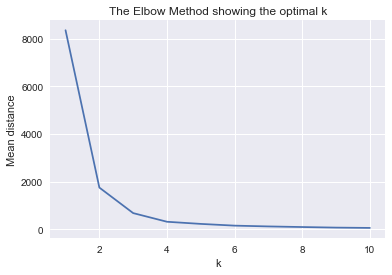

In [19]:
k_clusters = range(1, 11)
distances = mean_distances(10, X)
plt.plot(k_clusters, distances)
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

3 is optimal value of k. We can also check the algorithm with another values:


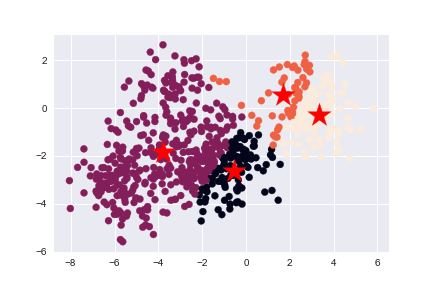
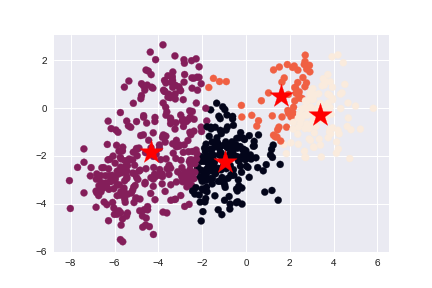
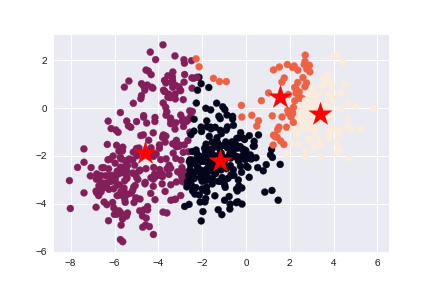
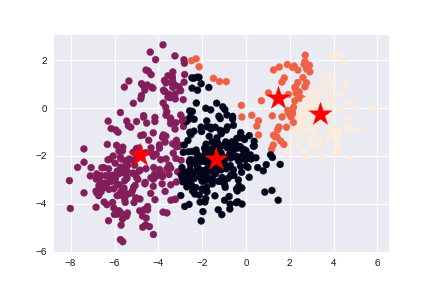
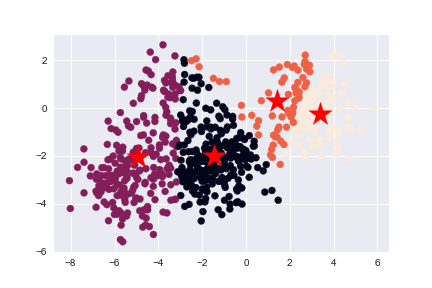
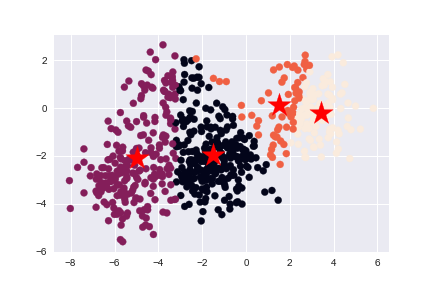
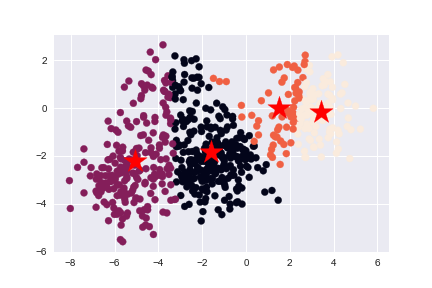
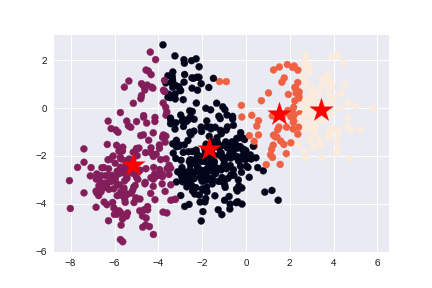
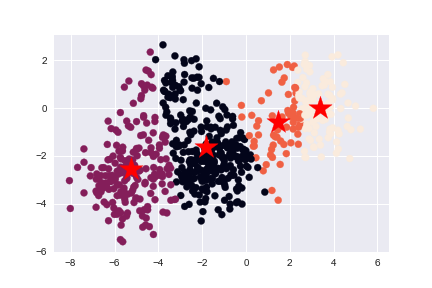
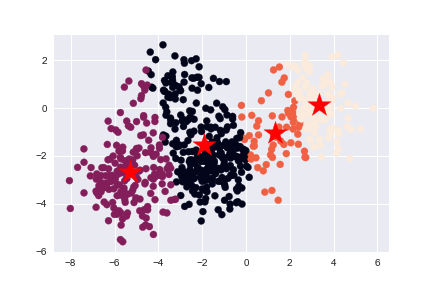
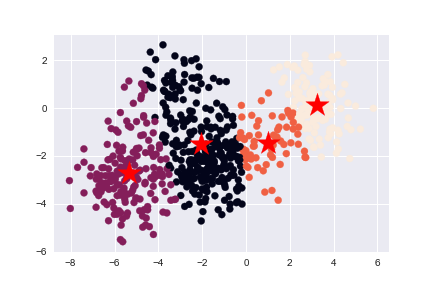
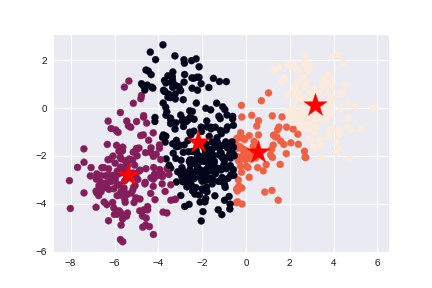
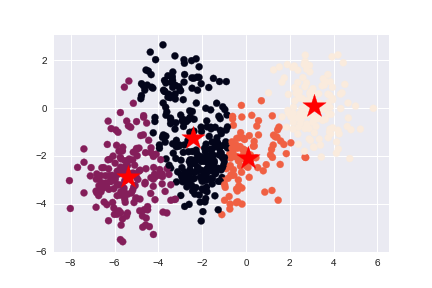
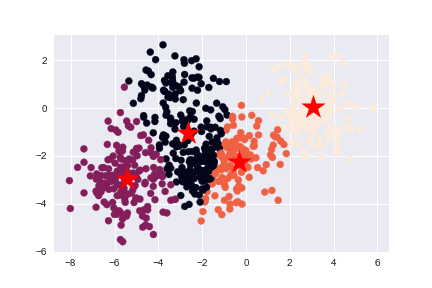
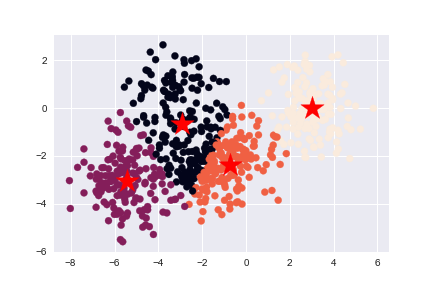
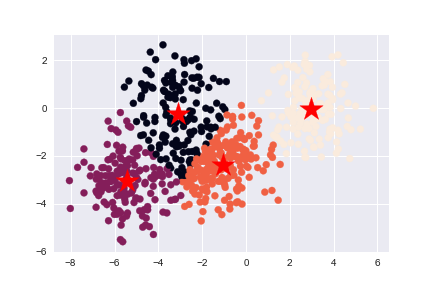
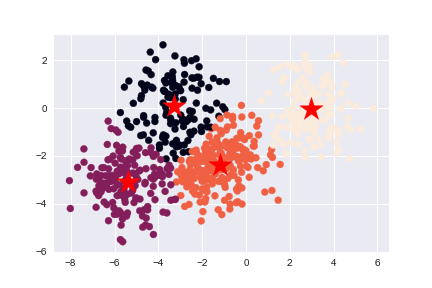
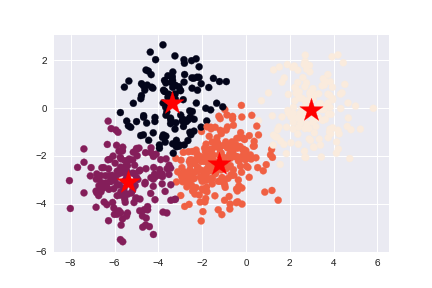
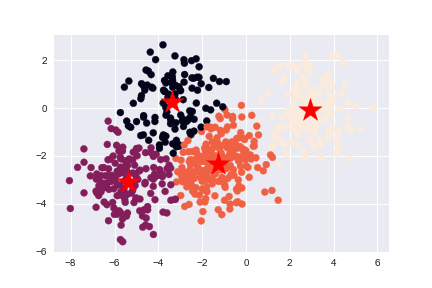
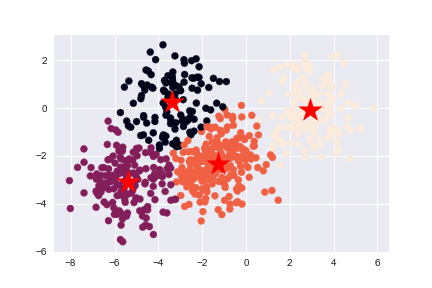
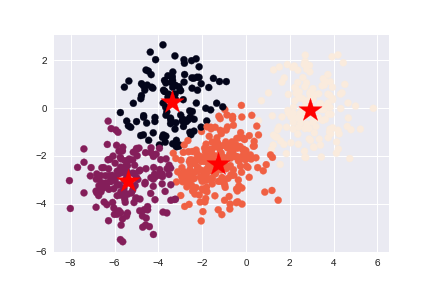
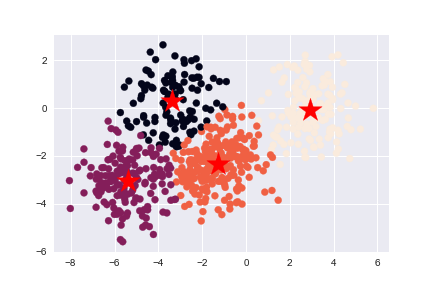
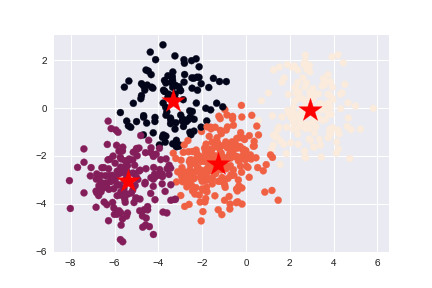
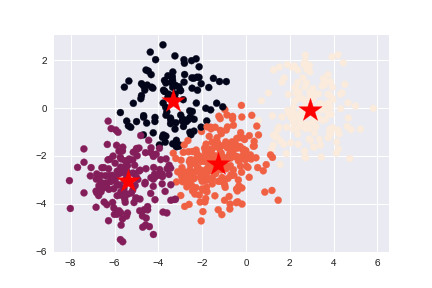
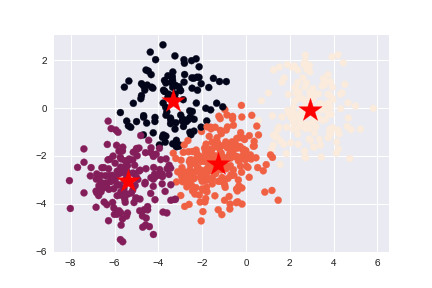
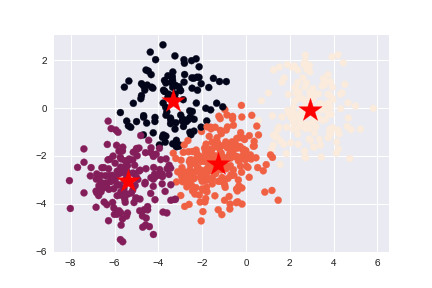
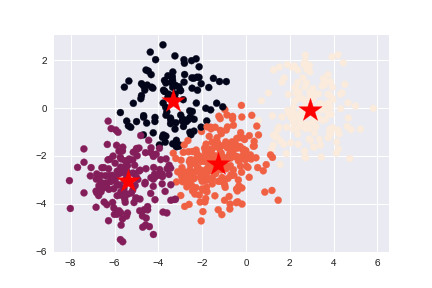
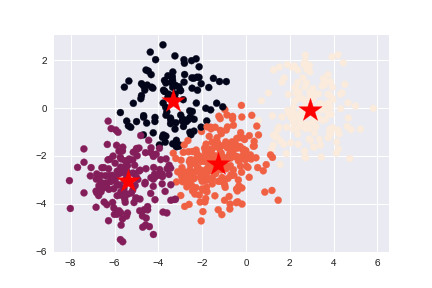
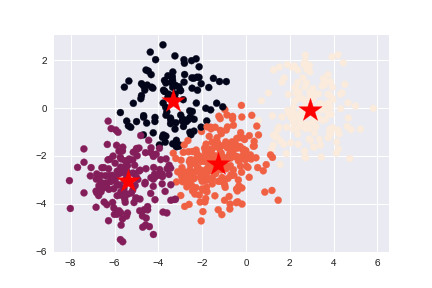
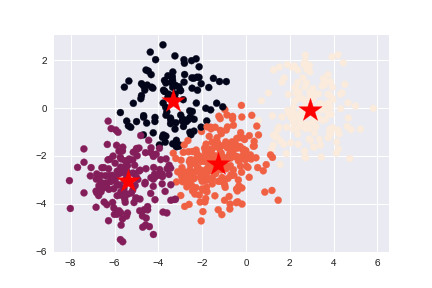

In [20]:
model_new = KMeans(X, 4)
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model_new.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():
    
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model_new.closest_centroid(centroids)
    centroids = model_new.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)